In [12]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random

In [13]:
### Function to save results as .txt files
import pickle
def pick(file, name):
    with open('./ira_txt_1/' + name + '.txt', "wb") as fp:   #Pickling
        pickle.dump(file, fp)
def unpick(name):
    with open('./ira_txt_1/' + name + '.txt', "rb") as fp:   # Unpickling
        file = pickle.load(fp)
    return file

In [14]:
refM2 = unpick('refM2')
refM = unpick('refM')

In [66]:
C_M = unpick('C_M')

In [16]:
loc = unpick('loc')

In [17]:
lang_map = unpick('lang_map')

In [18]:
R = []
B = []
E = []

for i in range(len(lang_map)):
    x = lang_map[i]
    if x == 'r': R.append(i)
    elif x == 'b': E.append(i)
    elif x == 'g': B.append(i)
    else: print('fuck')

In [19]:
print(lang_map)
for i in range(len(lang_map)):
    if lang_map[i] == 'b': lang_map[i] = 'teal'

['g', 'g', 'g', 'g', 'g', 'b', 'b', 'g', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'g', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'r', 'r', 'b', 'b', 'r', 'b', 'b', 'g', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']


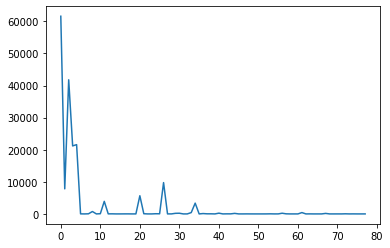

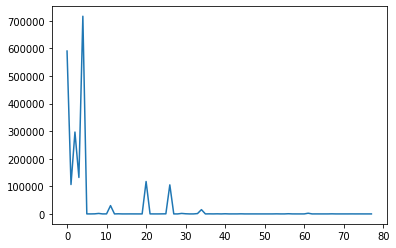

In [20]:
for i in range(len(loc)):
    refers = np.sum(refM2,0)
    plt.plot(refers)
    plt.show()
    break
    
for i in range(len(loc)):
    refers = np.sum(refM,0)
    plt.plot(refers)
    plt.show()
    break

In [21]:
def draw_circle(x,y,n,r):
    points = []
    th = (2*np.pi) / n
    for i in range(n):
        xv = x + r * np.sin(th * i)
        yv = y + r * np.cos(th * i)
        points.append([xv,yv])
    return points

In [22]:
M = np.copy(refM)
M2 = np.copy(refM2)

In [23]:
for i in range(len(loc)):
    M[i,i] = 0
    M2[i,i] = 0

In [24]:
M[M < 100] = 0 

In [25]:
import networkx as nx
G = nx.from_numpy_matrix(M, create_using=nx.DiGraph())
pos=nx.spring_layout(G, k = 2.5, seed = 5)

In [26]:
print(len(loc))
print(len(R+B+E))

78
78


In [27]:
Ep = draw_circle(-2,0,len(E) - len(list(nx.isolates(G))) + 1,0.5)

Bp = draw_circle(0,0,len(B),0.5)

Rp = draw_circle(2,0,len(R),0.5)

x = -2
y = -0.75

b = 0
r = 0
e = 0 #+ len(E)

for i in range(len(loc)):
    if i in R:
        pos[i] = Rp[r]
        r += 1
        
    if i in B:
        pos[i] = Bp[b]
        b += 1
        
    if i in E: 
        pos[i] = Ep[e]
        e += 1
        
    if i in list(nx.isolates(G)): 
        pos[i] = [x,y]
        x += 0.3
        if x > 2:
            x = -2
            y -= 0.25
        e -= 1

pos[0] = [0,0.75]

C:\Users\macki\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\macki\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


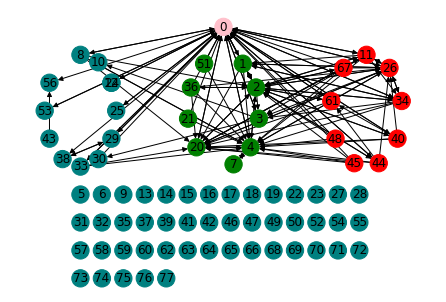

In [28]:
#G.remove_node(0)
#G.remove_nodes_from(R)
#G.remove_nodes_from(B)

cmap = []
for i in G.nodes():
    cmap.append(lang_map[i])
    
cmap[0] = 'pink'

for i in list(nx.isolates(G)):
    cmap[i] = 'teal'

nx.draw(G,pos, node_color = cmap)
nx.draw_networkx_labels(G,pos)
plt.show()

In [29]:
profiles = unpick('profiles')
def get_nums(i):
    x = profiles[i]
    return x[0], x[1], x[2]
gd = unpick('gd')
def get_gd(i):
    return gd[i]

In [30]:
unc = list(nx.isolates(G))

print(get_nums(0))

data = np.array([0,0,0])
for i in unc:
    u, t, d = get_nums(i)
#    print([u,t,d])
    temp = np.array([0,0,0])
    temp[0] += u
    temp[1] += t
    temp[2] += d
    data += temp

print(data)
print(data/len(unc))

(1811, 2722156, 512.3175041413583)
[   627 319635   2971]
[  13.34042553 6800.74468085   63.21276596]


In [31]:
self = [0] + list(nx.isolates(G))
#self = range(78)

In [32]:
MS = np.copy(refM)
MS = MS[self]
MS = MS[:,self]
MS[MS < 25] = 0 

In [33]:
import networkx as nx
GS = nx.from_numpy_matrix(MS, create_using=nx.DiGraph())
#GS.remove_nodes_from(list(nx.isolates(GS)))

labels = {}
for i in range(len(self)):
    labels[i] = self[i]
GS = nx.relabel_nodes(GS, labels)

pos=nx.spring_layout(GS, k = 2.5, seed = 5)

In [34]:
ps = draw_circle(0,0,len(self),0.5)

x = -0.7

b = 0
r = 0
e = 0 #+ len(E)

for i in self:
    pos[i] = ps[r]
    r += 1

pos[0] = [0,0]

In [35]:
#GS.remove_nodes_from( list(nx.isolates(GS)) )

In [36]:
cols = ['teal'] * 48
cols[0] = 'pink'

In [37]:
print(GS.nodes)

[0, 5, 6, 9, 13, 14, 15, 16, 17, 18, 19, 22, 23, 27, 28, 31, 32, 35, 37, 39, 41, 42, 46, 47, 49, 50, 52, 54, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]


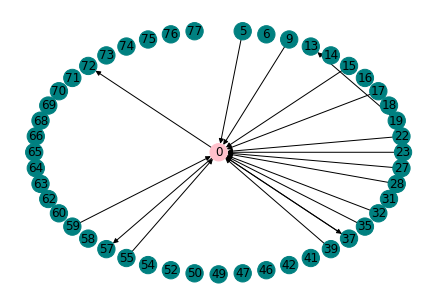

In [38]:
nx.draw(GS,pos, node_color = cols)
nx.draw_networkx_labels(GS,pos)
plt.show()

In [64]:
CS = np.copy(C_M)

In [73]:
pick(CS, 'C_MF')

5 :  18


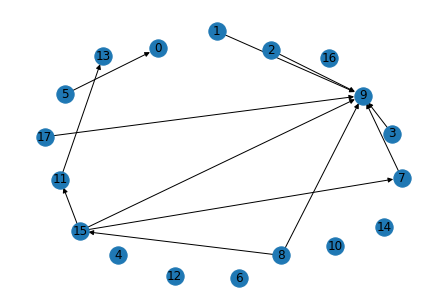

6 :  6


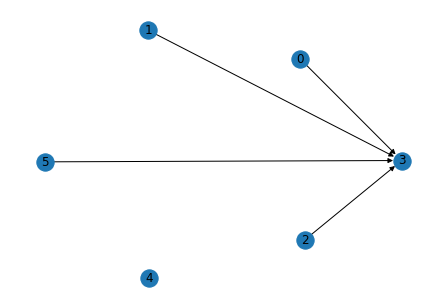

9 :  8


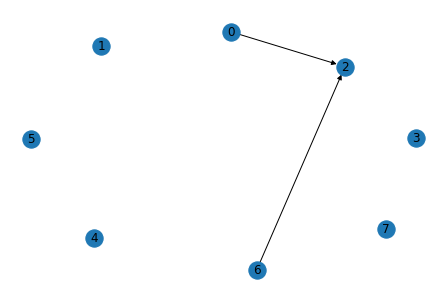

13 :  36


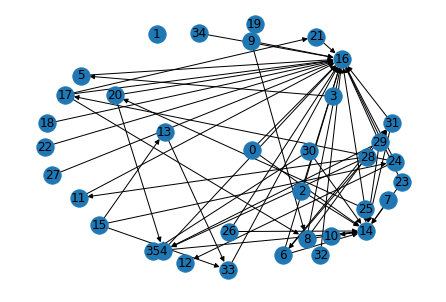

14 :  5


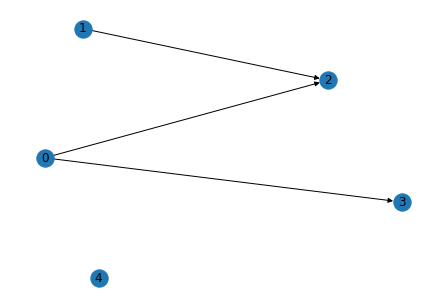

15 :  19


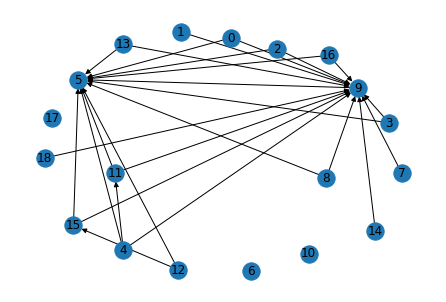

16 :  43


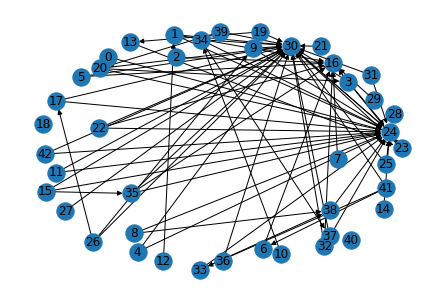

17 :  33


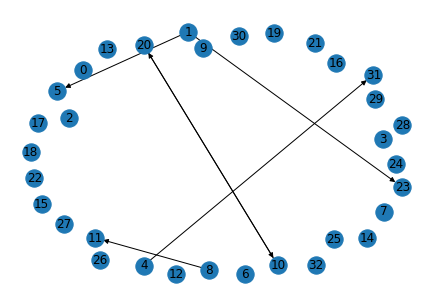

18 :  9


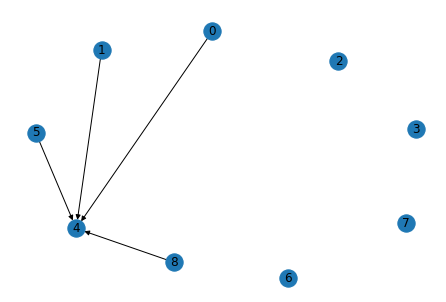

19 :  29


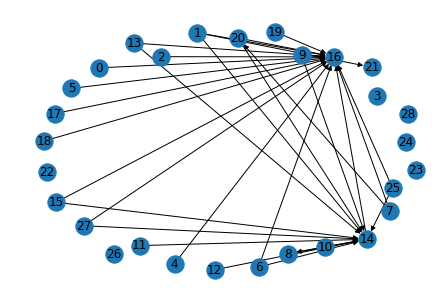

22 :  16


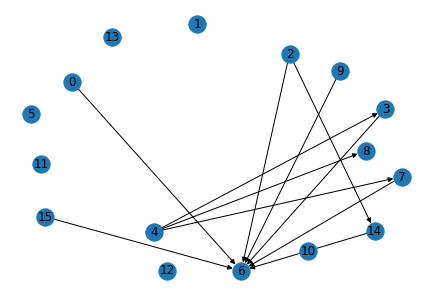

23 :  15


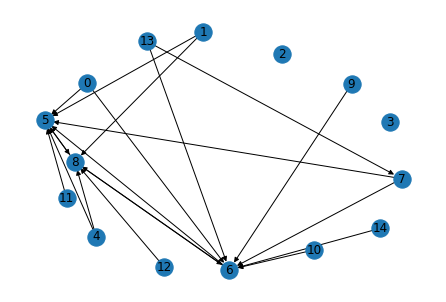

27 :  10


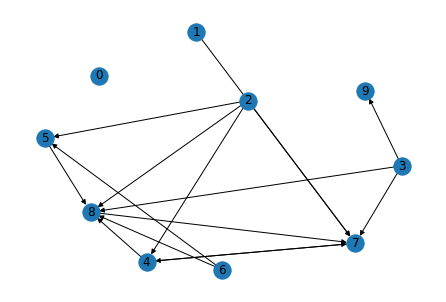

28 :  37


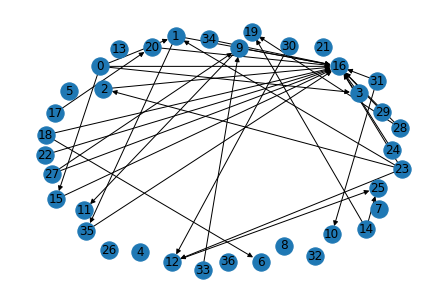

31 :  9


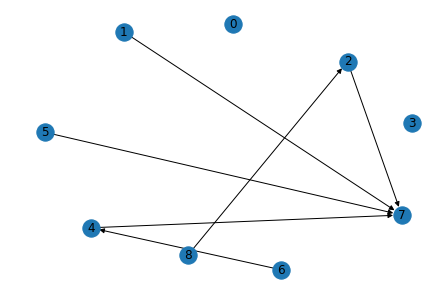

32 :  16


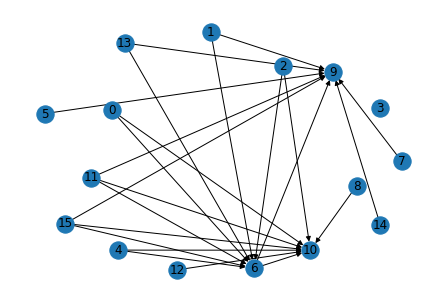

35 :  14


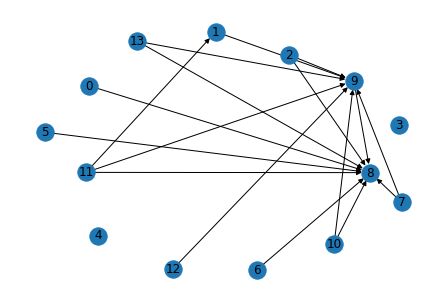

37 :  11


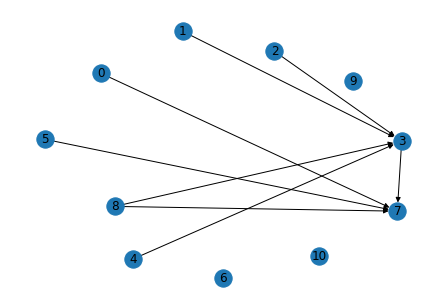

39 :  9


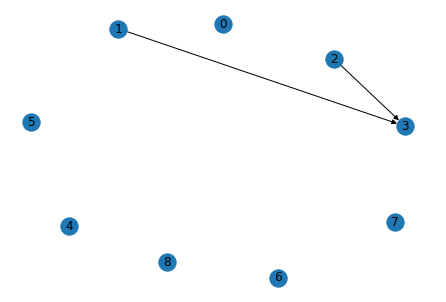

41 :  8


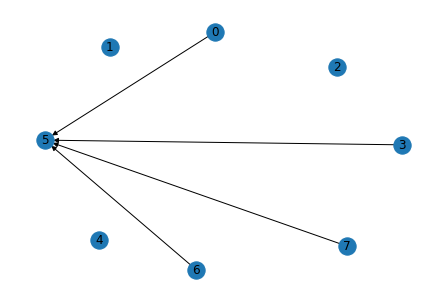

42 :  6


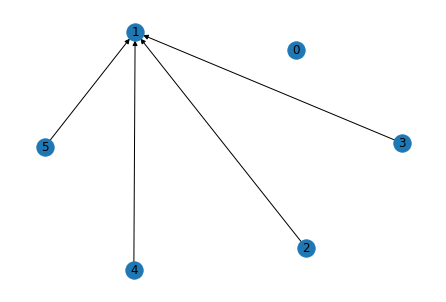

46 :  5


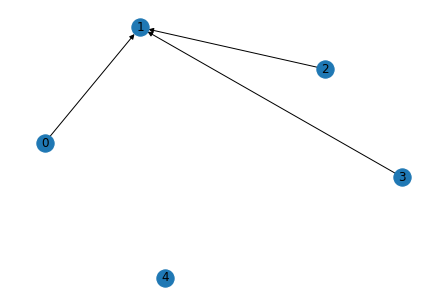

47 :  7


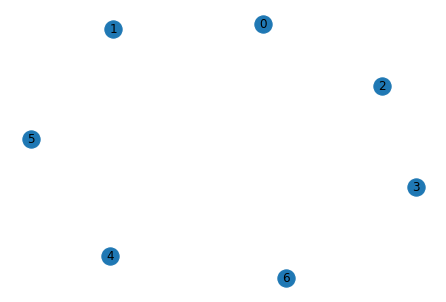

49 :  46


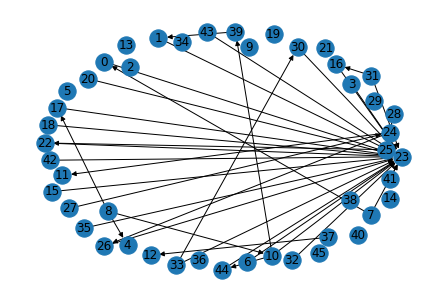

50 :  7


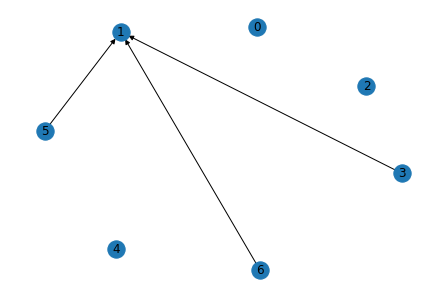

52 :  14


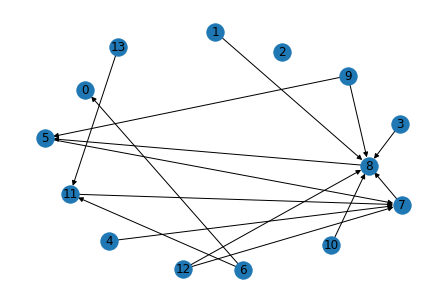

54 :  7


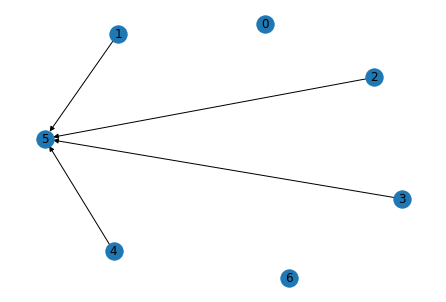

55 :  10


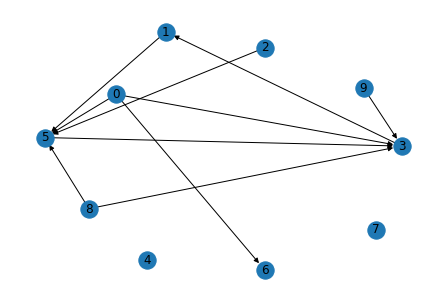

57 :  5


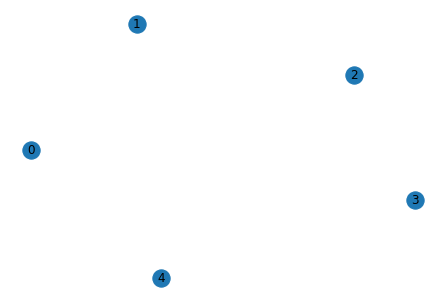

58 :  6


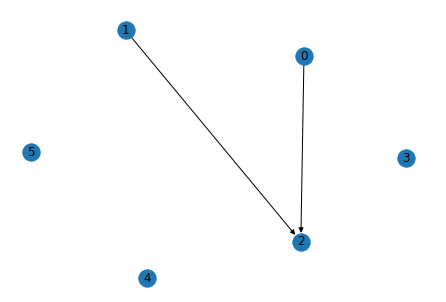

59 :  5


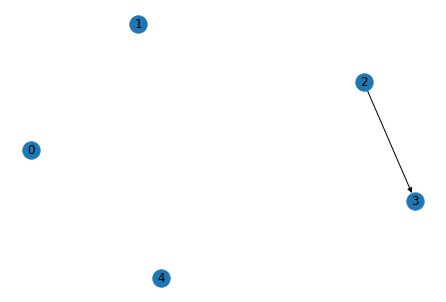

60 :  4


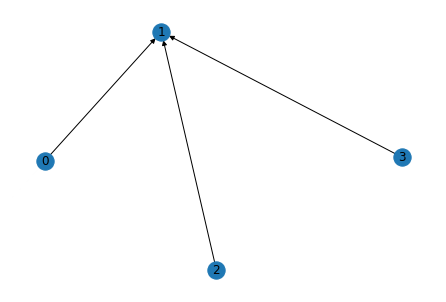

62 :  5


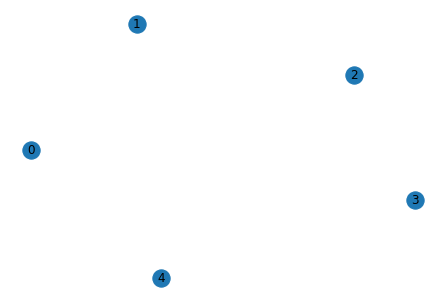

63 :  51


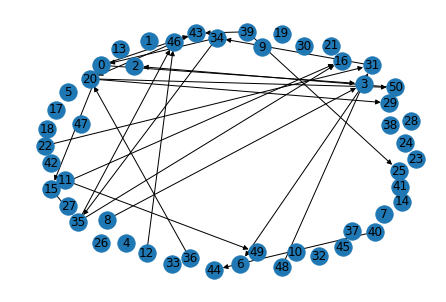

64 :  12


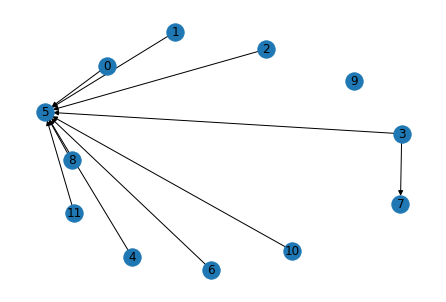

65 :  8


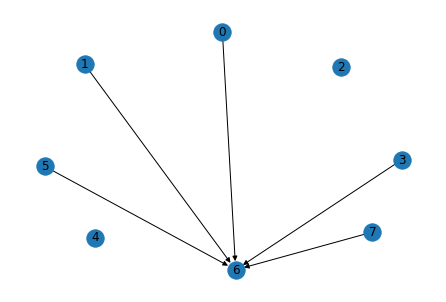

66 :  5


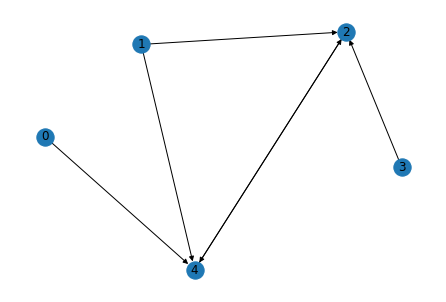

68 :  5


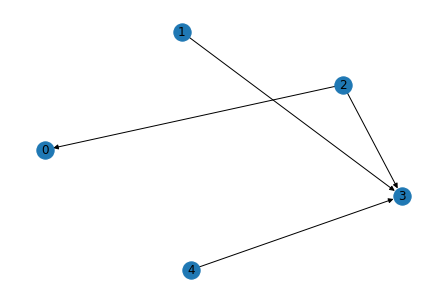

69 :  10


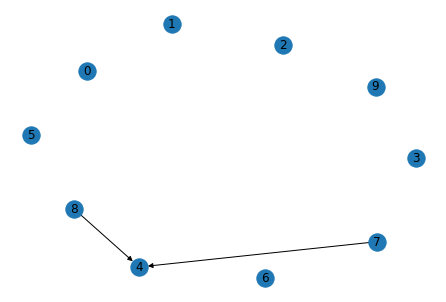

70 :  8


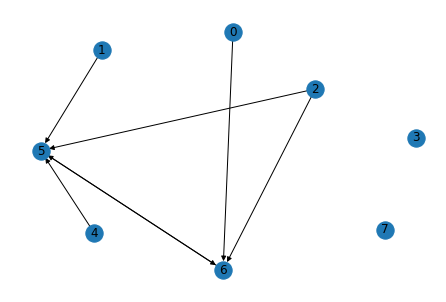

71 :  13


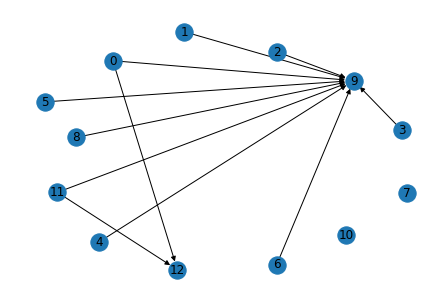

72 :  12


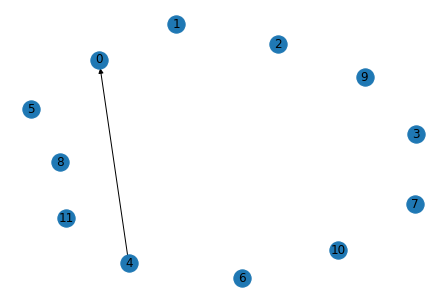

73 :  5


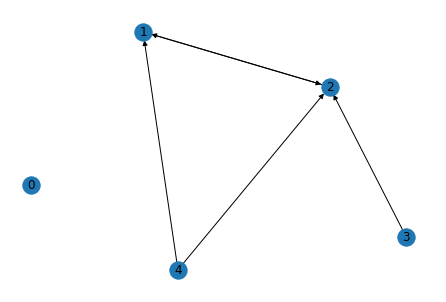

74 :  5


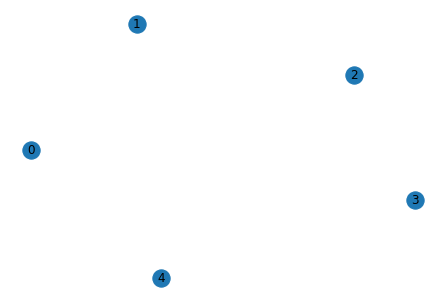

75 :  5


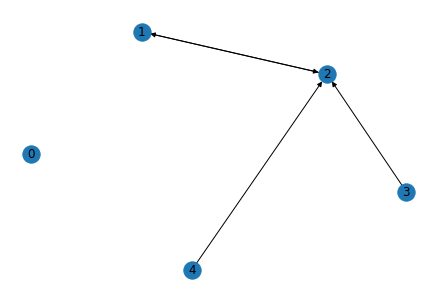

76 :  5


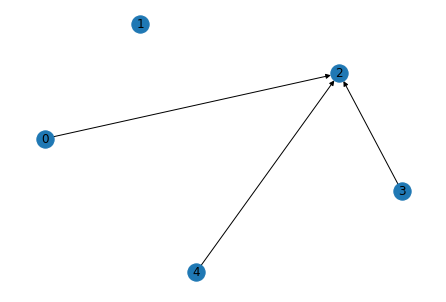

77 :  5


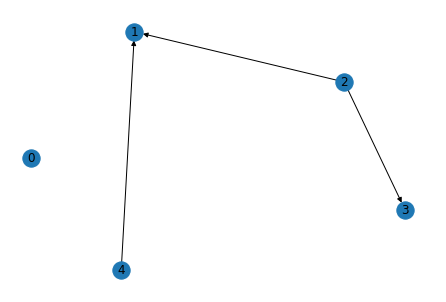

In [72]:
for i in self:
    if i != 0:
        
        x = loc[i]
        print(i,': ', len(x))
        
        rand = np.random.binomial(3, 0.5, 1)
        rand = int(rand)
        
        for i in range(rand):
            r = np.random.binomial(len(x), 0.5, 1)
            r = int(r)
            f2 = np.random.binomial(1, 0.5, len(x))
#            print(r,f2)

        
        GC = nx.from_numpy_matrix(tmp, create_using=nx.DiGraph())
        pos=nx.spring_layout(GC, k = 2.5, seed = 5)
        nx.draw(GC,pos)
        nx.draw_networkx_labels(GC,pos)
        plt.show()

In [61]:
users = [0,2]

x = np.zeros((5,5))

for u in users:
    t = x[u]
    for u in users:
        t[u] += 1

print(x)

[[1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
for i in range(len(loc)):
    if i != 0:
        x = loc[i]
        CS = np.copy(C_M)
        CS = CS[x]
        print(np.sum(CS))
        print(np.sum(C_M[:,x]))
        CS = CS[:,x]
        GC = nx.from_numpy_matrix(CS, create_using=nx.DiGraph())
        pos=nx.spring_layout(GC, k = 2.5, seed = 5)
        nx.draw(GC,pos)
        nx.draw_networkx_labels(GC,pos)
        plt.show()

In [230]:
print(np.sum(C_M))

2151287
